# Bot Detection -- Comparing Classifiers
## ISYE6740 ML Project Spring 2021
### Katherine Barthelson, Daniel Tylutki, Elizabeth Yates

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from numpy import inf
from sklearn.svm import SVC

In [37]:
with open('reddit_bots_train_gold.csv') as f:
    data = pd.read_csv(f, sep=',', dtype={
        "banned_by": str,
        "no_follow": np.float64,
        "link_id": str,
        "gilded": np.float64,
        "author": str,
        "author_verified": np.float64,
        "author_comment_karma": np.float64,
        "author_link_karma": np.float64,
        "num_comments": np.float64,
        "created_utc": np.float64,
        "score": np.float64,
        "over_18": np.float64,
        "body": str,
        "downs": np.float64,
        "is_submitter": np.float64,
        "num_reports": np.float64,
        "controversiality": np.float64,
        "quarantine": np.float64,
        "ups": np.float64,
        "is_bot": np.float64,
        "is_troll": np.float64,
        "recent_comments": str})

In [38]:
print(len(data))

761890


In [39]:
data.head()

,Unnamed: 0,author,author_verified,author_comment_karma,author_link_karma,author_%_is_submitter,author_avg_num_comments,author_%_no_follow,author_%_gilded,author_avg_score,...,gilded,created_utc,score,over_18,ups,downs,controversiality,quarantine,is_bot,is_troll
0,0,ADHDbot,0.0,-6.0,1.0,0.0,2.556886,1.0,0.0,0.971058,...,0.0,1.415027e+09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,ADHDbot,0.0,-6.0,1.0,0.0,2.556886,1.0,0.0,0.971058,...,0.0,1.415032e+09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,ADHDbot,0.0,-6.0,1.0,0.0,2.556886,1.0,0.0,0.971058,...,0.0,1.415060e+09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,ADHDbot,0.0,-6.0,1.0,0.0,2.556886,1.0,0.0,0.971058,...,0.0,1.415064e+09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,ADHDbot,0.0,-6.0,1.0,0.0,2.556886,1.0,0.0,0.971058,...,0.0,1.415096e+09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
features = data.drop(['Unnamed: 0', 'is_bot', 'author', 'body', 'created_utc'], axis=1)

#data = data.reset_index()

labels = data['is_bot']
labels

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
761885    0.0
761886    0.0
761887    0.0
761888    0.0
761889    0.0
Name: is_bot, Length: 761890, dtype: float64

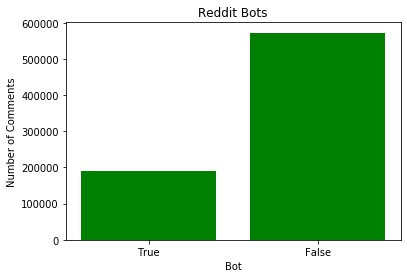

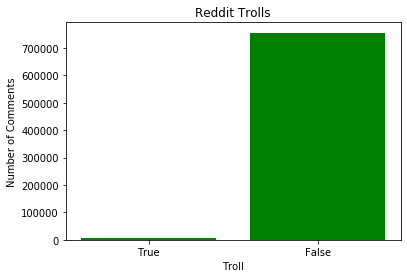

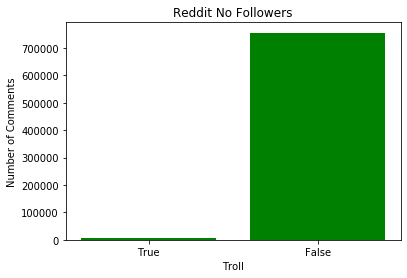

In [41]:
x = ['True', 'False']
Bot = [len(data[data['is_bot']==True]),len(data[data['is_bot']==False])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, Bot, color='green')
plt.xlabel("Bot")
plt.ylabel("Number of Comments")
plt.title("Reddit Bots")

plt.xticks(x_pos, x)

plt.show()

x = ['True', 'False']
Troll = [len(data[data['is_troll']==True]),len(data[data['is_troll']==False])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, Troll, color='green')
plt.xlabel("Troll")
plt.ylabel("Number of Comments")
plt.title("Reddit Trolls")

plt.xticks(x_pos, x)

plt.show()

x = ['True', 'False']
Troll = [len(data[data['is_troll']==True]),len(data[data['is_troll']==False])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, Troll, color='green')
plt.xlabel("Troll")
plt.ylabel("Number of Comments")
plt.title("Reddit No Followers")

plt.xticks(x_pos, x)

plt.show()

(0.0, 20000)

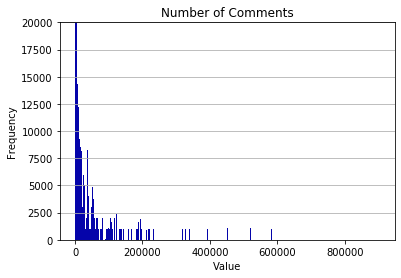

In [42]:
n, bins, patches = plt.hist(x=data['author_comment_karma'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of Comments')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=20000)

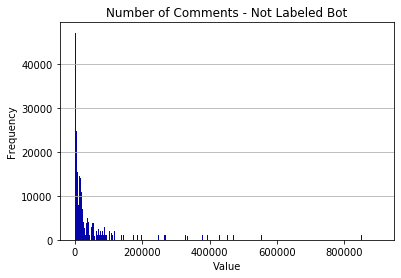

In [43]:
bots_only = data[data['is_bot']==True]
not_bots = data[data['is_bot']==False]
n, bins, patches = plt.hist(x=not_bots['author_comment_karma'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of Comments - Not Labeled Bot')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=20000)

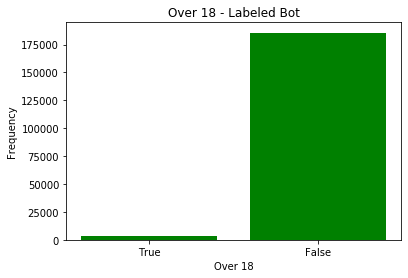

In [44]:
x = ['True', 'False']
Bot = [len(bots_only[bots_only['over_18']==1]),len(bots_only[bots_only['over_18']==0])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, Bot, color='green')
plt.xlabel("Over 18")
plt.ylabel("Frequency")
plt.title("Over 18 - Labeled Bot")

plt.xticks(x_pos, x)

plt.show()

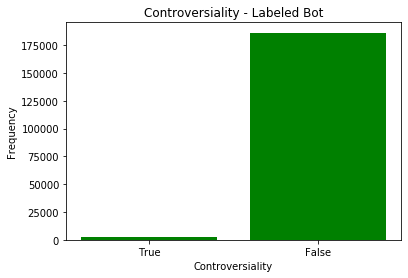

In [45]:
x = ['True', 'False']
Bot = [len(bots_only[bots_only['controversiality']==1]),len(bots_only[bots_only['controversiality']==0])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, Bot, color='green')
plt.xlabel("Controversiality")
plt.ylabel("Frequency")
plt.title("Controversiality - Labeled Bot")

plt.xticks(x_pos, x)

plt.show()

In [46]:
print(100*len(bots_only[bots_only['over_18']==1])/len(bots_only))
print(100*len(not_bots[not_bots['over_18']==1])/len(not_bots))

print(100*len(bots_only[bots_only['controversiality']==1])/len(bots_only))
print(100*len(not_bots[not_bots['controversiality']==1])/len(not_bots))

print(100*len(bots_only[bots_only["no_follow"]==1])/len(bots_only))
print(100*len(not_bots[not_bots["no_follow"]==1])/len(not_bots))

1.9022557582867017
2.6753236320836264
1.5519236561355674
1.9341961193836976
87.44775401719428
64.72851227907188


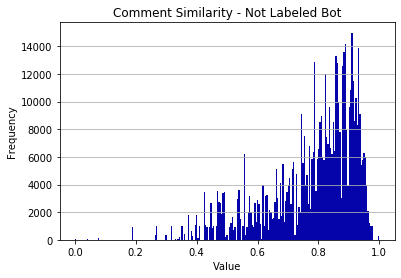

In [47]:
n, bins, patches = plt.hist(x=not_bots['author_avg_comment_similarity'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comment Similarity - Not Labeled Bot')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=100)

(-0.012857142857142857, 0.1)

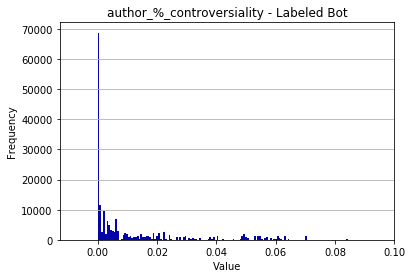

In [48]:
n, bins, patches = plt.hist(x=bots_only['author_%_controversiality'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('author_%_controversiality - Labeled Bot')
maxfreq = n.max()
# Set a clean upper x-axis limit.
plt.xlim(xmax=.1)

(-0.05, 0.2)

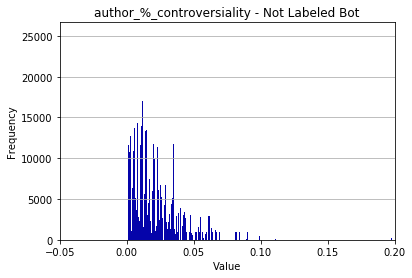

In [49]:
n, bins, patches = plt.hist(x=not_bots['author_%_controversiality'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('author_%_controversiality - Not Labeled Bot')
maxfreq = n.max()
# Set a clean upper x-axis limit.
plt.xlim(xmax=.2)

(0.0, 35000)

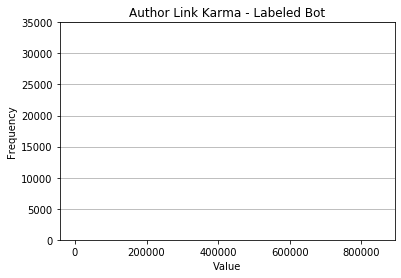

In [50]:
n, bins, patches = plt.hist(x=bots_only['author_link_karma'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Author Link Karma - Labeled Bot')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=35000)

## Preprocessing and Preparing the Training Data

In [51]:
features = features.values.astype('Int64')
labels = labels.values.astype('int')

#features[features == inf] = np.finfo(np.float64).max

/Users/KatieBarthelson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [52]:
features = preprocessing.scale(features)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=16)

## Variable Selection
### Lasso

0.5
[[0.1865665  0.18674423 0.1863569  0.18615884 0.18704318]
 [0.1865665  0.18674423 0.1863569  0.18615884 0.18704318]
 [0.1865665  0.18674423 0.1863569  0.18615884 0.18704318]
 [0.1865665  0.18674423 0.1863569  0.18615884 0.18704318]
 [0.1865665  0.18674423 0.1863569  0.18615884 0.18704318]]
Fitted Model
<bound method BaseEstimator.get_params of LassoCV(alphas=[0.5, 0.4, 0.3, 0.2, 0.1], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=5, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.01, verbose=False)>
Coefficients
[-0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0.]
sum-of-squares residuals
28521.780503501166


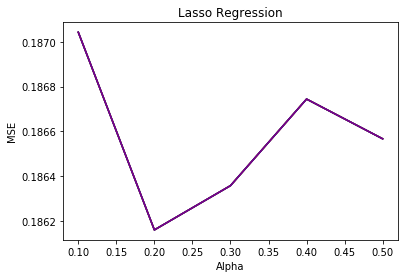

[[ 0.00000000e+00 -2.28968556e-01 -2.54931265e-01 -2.60673023e-01
  -2.65195766e-01 -2.65959342e-01 -2.71114718e-01 -2.73559984e-01
  -2.79350172e-01 -2.80706532e-01 -2.81512611e-01 -2.81653068e-01
  -2.82318131e-01 -2.82516784e-01 -2.82650197e-01 -2.82650197e-01
  -2.82914992e-01 -2.83144241e-01 -2.83218030e-01 -2.83261205e-01
  -2.83338141e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.11093849e-04
   3.30000700e-03  4.09769692e-03  4.64509025e-03  4.64509025e-03
   5.69608263e-03  6.60012809e-03  6.89063804e-03  7.06143231e-03
   7.36703735e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.39058636e-02  1.72903360e-02  1.99040307e-02  2.03332114e-02
   2.40915928e-02  2.51925710e-02  2.59469655e-02  2.59469655e-02
   2.71330351e-02  2.81424337e-02  2.8

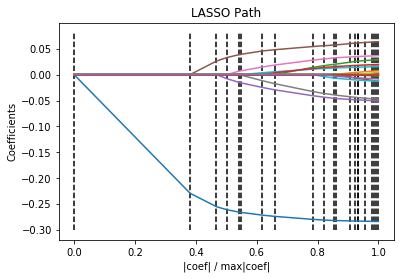

In [53]:
from sklearn.linear_model import LassoCV
lass = LassoCV(alphas=[5e-1,4e-1,3e-1,2e-1,1e-1], tol=0.01, selection='cyclic',n_alphas=5,normalize=True)
lassfit = lass.fit(x_train, y_train)
print(lass.alpha_)
print(lass.mse_path_)
predict_lass = lassfit.predict(x_test)
print("Fitted Model")
print(lassfit.get_params)
print("Coefficients")
print(lassfit.coef_)
SSR = ((y_test - predict_lass) ** 2).sum()
print("sum-of-squares residuals")
print(SSR)

plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], lass.mse_path_[0], color='red')
plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], lass.mse_path_[1], color='orange')
plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], lass.mse_path_[2], color='green')
plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], lass.mse_path_[3], color='blue')
plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], lass.mse_path_[4], color='purple')
#plt.plot(test_X, predict_lass, color='blue')
plt.title('Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

from sklearn import linear_model
_, _, coefs = linear_model.lars_path(x_train, y_train, method='lasso')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

print(coefs)
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### Elastic Net

0.5
Fitted Model
<bound method BaseEstimator.get_params of ElasticNetCV(alphas=[0.5, 0.4, 0.3, 0.2, 0.1], copy_X=True, cv=None, eps=0.001,
             fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=True, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.001, verbose=0)>
Coefficients
[-0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0.]
sum-of-squares residuals
28521.780503501166


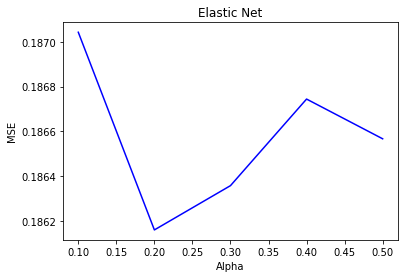

In [54]:
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(alphas=[5e-1,4e-1,3e-1,2e-1,1e-1], tol=0.001, selection='cyclic',normalize=True)
enetfit = enet.fit(x_train, y_train)
#cv_mse = np.mean(lass.cv_values_, axis=0)
print(enet.alpha_)
#print(cv_mse)

predict_enet = enetfit.predict(x_test)
print("Fitted Model")
print(enetfit.get_params)
print("Coefficients")
print(enetfit.coef_)
SSR = ((y_test - predict_enet) ** 2).sum()
print("sum-of-squares residuals")
print(SSR)

#plt.plot(test_X, test_y, color='red')
plt.plot([5e-1,4e-1,3e-1,2e-1,1e-1], enetfit.mse_path_[0], color='blue')
plt.title('Elastic Net')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

## Update dataset to include selected features

In [55]:
features = data.drop(['is_submitter', 'author_avg_score', 'author_avg_ups','author_avg_downs','quarantine','author_%_quarantine','num_comments','gilded','score','ups','downs','controversiality','no_follow','Unnamed: 0', 'is_bot', 'author', 'body', 'created_utc'], axis=1)
features = features.values.astype('Int64')
features = preprocessing.scale(features)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=16)

/Users/KatieBarthelson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


## Decision Tree

In [56]:
clf = DecisionTreeClassifier(max_depth=3,
  class_weight={0:1,1:2},
  min_samples_leaf=100)

clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_accuracy = accuracy_score(y_test, clf_pred)*100

print(clf_accuracy)
matrix = pd.crosstab(y_test, clf_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

93.79437976610797


Predicted,0,1,All
True,,,
0,108982,5400,114382
1,4056,33940,37996
All,113038,39340,152378


## Naive Bayes

In [57]:
nb_model = GaussianNB(var_smoothing = 1e-3)
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)*100

print(nb_accuracy)
matrix = pd.crosstab(y_test, nb_y_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

88.60924805418105


Predicted,0,1,All
True,,,
0,100407,13975,114382
1,3382,34614,37996
All,103789,48589,152378


## Logistic Regression

In [58]:
log = LogisticRegression(max_iter=100,tol=0.001)
log_pred = log.fit(x_train,y_train).predict(x_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_conf = confusion_matrix(y_test, log_pred)
log_prec = precision_score(y_test, log_pred,average=None)
log_recall = recall_score(y_test, log_pred,average=None)
log_f1 = f1_score(y_test,log_pred,average=None)
print("Logistic Regression ------------------------------")
print("Accuracy %f" % log_accuracy)
print("Precision")
print(log_prec)
print("Recall")
print(log_recall)
print("F-1 Score")
print(log_f1)
matrix = pd.crosstab(y_test, log_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

Logistic Regression ------------------------------
Accuracy 0.914660
Precision
[0.95883194 0.79820542]
Recall
[0.92607228 0.88030319]
F-1 Score
[0.94216743 0.83724656]


Predicted,0,1,All
True,,,
0,105926,8456,114382
1,4548,33448,37996
All,110474,41904,152378


## SVM

In [59]:
svm = SVC(kernel='linear',max_iter=200)
svm_pred = svm.fit(x_train,y_train).predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred,average=None)
svm_recall = recall_score(y_test, svm_pred,average=None)
svm_f1 = f1_score(y_test, svm_pred,average=None)
print("SVM ------------------------------")
print("Accuracy %f" % svm_accuracy)
print("Precision")
print(svm_prec)
print("Recall")
print(svm_recall)
print("F-1 Score")
print(svm_f1)
matrix = pd.crosstab(y_test, svm_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

/Users/KatieBarthelson/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM ------------------------------
Accuracy 0.258253
Precision
[0.8124424  0.25024633]
Recall
[0.01541326 0.98928835]
F-1 Score
[0.03025259 0.39944953]


Predicted,0,1,All
True,,,
0,1763,112619,114382
1,407,37589,37996
All,2170,150208,152378


## Kernel SVM

In [60]:
ksvm = SVC(kernel='poly', degree=8,max_iter=200)
ksvm_pred = ksvm.fit(x_train,y_train).predict(x_test)
ksvm_accuracy = accuracy_score(y_test, ksvm_pred)
ksvm_conf = confusion_matrix(y_test, ksvm_pred)
ksvm_prec = precision_score(y_test, ksvm_pred,average=None)
ksvm_recall = recall_score(y_test, ksvm_pred,average=None)
ksvm_f1 = f1_score(y_test, ksvm_pred,average=None)
print("Kernel SVM ------------------------------")
print("Accuracy %f" % ksvm_accuracy)
print("Precision")
print(ksvm_prec)
print("Recall")
print(ksvm_recall)
print("F-1 Score")
print(ksvm_f1)
matrix = pd.crosstab(y_test, ksvm_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

/Users/KatieBarthelson/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Kernel SVM ------------------------------
Accuracy 0.256087
Precision
[0.96050269 0.25089909]
Recall
[0.00935462 0.99884198]
F-1 Score
[0.01852878 0.40105675]


Predicted,0,1,All
True,,,
0,1070,113312,114382
1,44,37952,37996
All,1114,151264,152378


## Neural Network

In [61]:
nn = MLPClassifier(random_state=1, max_iter=10)
nn_pred = nn.fit(x_train,y_train).predict(x_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_conf = confusion_matrix(y_test, nn_pred)
nn_prec = precision_score(y_test, nn_pred,average=None)
nn_recall = recall_score(y_test, nn_pred,average=None)
nn_f1 = f1_score(y_test, nn_pred,average=None)
print("Neural Network ------------------------------")
print("Accuracy %f" % nn_accuracy)
print("Precision")
print(nn_prec)
print("Recall")
print(nn_recall)
print("F-1 Score")
print(nn_f1)
matrix = pd.crosstab(y_test, nn_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

/Users/KatieBarthelson/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network ------------------------------
Accuracy 0.951279
Precision
[0.96820227 0.90061851]
Recall
[0.96684793 0.90441099]
F-1 Score
[0.96752463 0.90251077]


Predicted,0,1,All
True,,,
0,110590,3792,114382
1,3632,34364,37996
All,114222,38156,152378


## K-Nearest Neighbors

In [62]:
knn = KNeighborsClassifier()
knn_pred = knn.fit(x_train,y_train).predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred,average=None)
knn_recall = recall_score(y_test, knn_pred,average=None)
knn_f1 = f1_score(y_test, knn_pred,average=None)
print("KNN ------------------------------")
print("Accuracy %f" % knn_accuracy)
print("Precision")
print(knn_prec)
print("Recall")
print(knn_recall)
print("F-1 Score")
print(knn_f1)
matrix = pd.crosstab(y_test, knn_pred, rownames=["True"], colnames=["Predicted"], margins=True)
matrix

KNN ------------------------------
Accuracy 0.999921
Precision
[0.99992132 0.99992103]
Recall
[0.99997377 0.99976313]
F-1 Score
[0.99994755 0.99984208]


Predicted,0,1,All
True,,,
0,114379,3,114382
1,9,37987,37996
All,114388,37990,152378


### References 

Skowronski, J. (2019, July 30). Identifying trolls and bots on Reddit with machine learning (part 2). Retrieved March 22, 2021, from https://towardsdatascience.com/identifying-trolls-and-bots-on-reddit-with-machine-learning-709da5970af1  